## Part1: Observations and Insights 

1. From the boxplots, we know that Capomulin and Ramicane have lower medians than Infubinol and Ceftamin. Also, none of the four treatments in the boxplot graph have outliers, except for Infubinol, which has one lower outlier close to 38 final tumor volume. I think that Capomulin and Ramicane are better drugs than the other two, since they make the end result smaller than the other drugs.

2. By the linear regression model, we know that the mouse weight has a strong positive relationship with the average tumor volume, which means if the mouse has a higher weight, then the average tumor volume will be higher on average. Besides this, the correlation coefficient bewteen these two variables is strong at 0.84.

3. From the barplot of the time points, we know that Capomulin and Ramicane appear the most in the timepoint dataset. Most of the other drugs have around 170-180 timepoints in the dataset. From the pie chart, it looks like there are almost the same number of males and females.

## Part2: Codes and Graphs 

### 1. Prepare the Data

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# merge data by 'Mouse ID'
combine_data = pd.merge(mouse_metadata,study_results,on = "Mouse ID",how = 'outer')
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice (unique).
total_mice = combine_data["Mouse ID"].nunique()
print(f"The total number of mice is {total_mice}.")

The total number of mice is 249.


In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = combine_data[combine_data.duplicated(["Mouse ID","Timepoint"])]
duplicated_mouse = duplicated_mouse_df["Mouse ID"].unique()[0]
print(f"The duplicated mice ID is {duplicated_mouse}.")

The duplicated mice ID is g989.


In [151]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[combine_data["Mouse ID"] == duplicated_mouse,:].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_data = combine_data.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = False)
final_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
final_data = final_data[-final_data["Mouse ID"].isin(["g989"])]
total_mice2 = final_data["Mouse ID"].nunique()
print(f"The total number of mice is {total_mice2}.")

The total number of mice is 248.


### 2. Summary Statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_data = final_data.groupby("Drug Regimen")
mean = group_data["Tumor Volume (mm3)"].mean()
median = group_data["Tumor Volume (mm3)"].median()
var = group_data["Tumor Volume (mm3)"].var()
std = group_data["Tumor Volume (mm3)"].std()
sem = group_data["Tumor Volume (mm3)"].sem(ddof = 1)

group_data_result = pd.DataFrame({
                      "Mean" : mean,
                      "Median" : median,
                      "Variance" : var,
                      "Standard Deviation" : std,
                      "Standard Error" :sem ,
})
group_data_result.head()

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
group_data_result2 = final_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var','std','sem']).rename(columns = {"mean":"Mean","median":"Median","var":"Variance","std":"Standard Deviation","sem":"Standard Error"})
group_data_result2.head()

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


### 3. Bar and Pie Charts

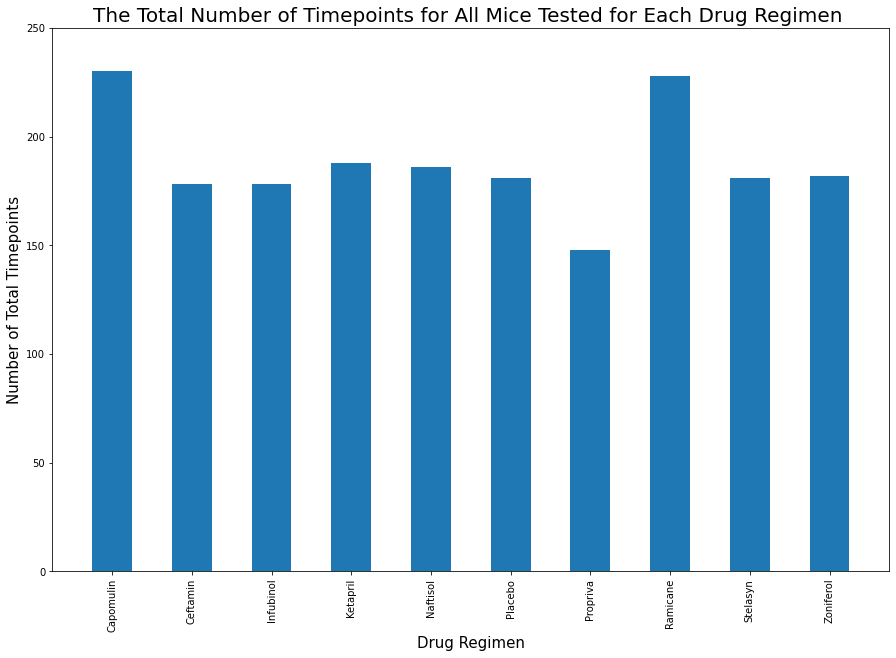

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = group_data["Timepoint"].count()
total_timepoint.plot(kind = "bar",figsize = (15,10))
Drug_Regimen = group_data["Drug Regimen"].unique().str.get(0)
x_axis = np.arange(len(Drug_Regimen))
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,250)
plt.title("The Total Number of Timepoints for All Mice Tested for Each Drug Regimen ", fontsize = 20)
plt.ylabel("Number of Total Timepoints", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.show()


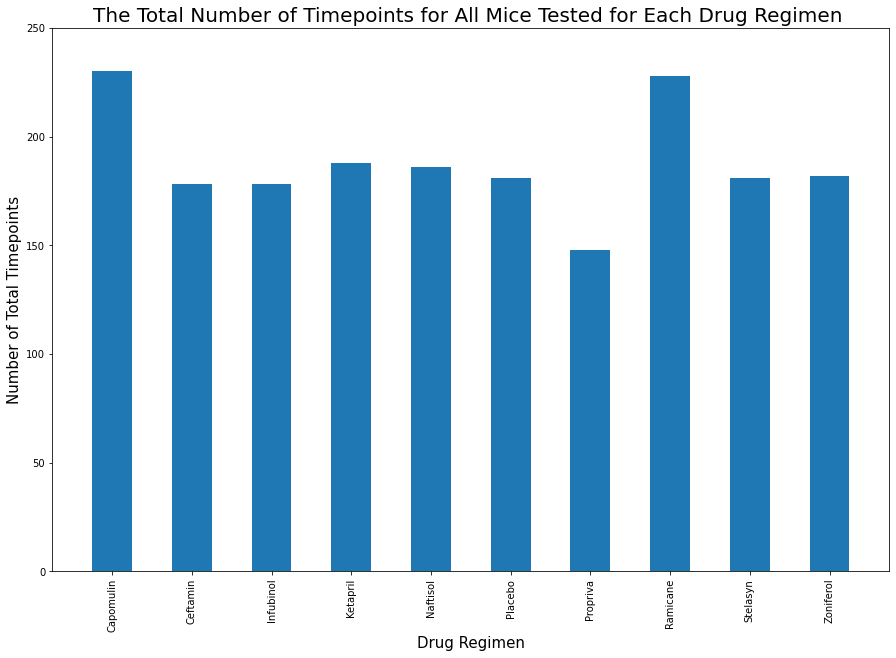

In [126]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Drug_Regimen = group_data["Drug Regimen"].unique().str.get(0)
x_axis = np.arange(len(Drug_Regimen))
tick_location = [value for value in x_axis]
plt.figure(figsize= (15,10))
plt.bar(x_axis,total_timepoint,align = "center",width = 0.5)
plt.xticks(tick_location,Drug_Regimen,rotation = "vertical")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,250)
plt.title("The Total Number of Timepoints for All Mice Tested for Each Drug Regimen ", fontsize = 20)
plt.ylabel("Number of Total Timepoints", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.show()

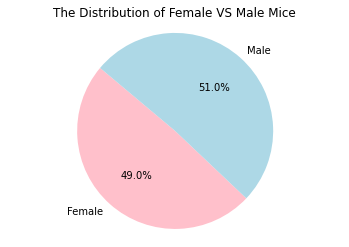

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group_data_Sex = final_data.groupby("Sex")
sex_count = group_data_Sex["Mouse ID"].count()
pies = ["Female","Male"]
colors = ["pink","lightblue"]
explode = [0,0]
plt.pie(sex_count,explode = explode, 
        labels = pies, colors = colors,
        autopct = "%1.1f%%",
        startangle = 140,
        )
plt.axis("equal")
plt.title("The Distribution of Female VS Male Mice")
plt.show()

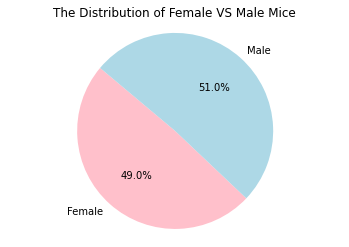

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_pie = sex_count.plot(kind = "pie", y = sex_count,
                         title = "The Distribution of Female VS Male Mice",
                         autopct = "%1.1f%%", colors = colors,
                         startangle = 140,
                         ylabel = "")
plt.axis("equal")
plt.show()


### 4. Quartiles, Outliers and Boxplots

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
group_data_ID = final_data.groupby("Mouse ID")
max_timepoint = group_data_ID["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint,columns = ["Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_data = pd.merge(final_data,max_timepoint_df,on = ["Mouse ID","Timepoint"],how = 'inner')
new_data = new_data[new_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
new_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [142]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for trt in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = new_data.loc[new_data["Drug Regimen"] == trt]
    tumor_vol.append(treatment_df["Tumor Volume (mm3)"])
    
# Determine outliers using upper and lower bounds
for i in range(4):
    quartiles = tumor_vol[i].quantile([0.25,0.5,0.75])
    lowerq = tumor_vol[i].quantile(0.25)
    upperq = tumor_vol[i].quantile(0.75)
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatment_list[i]},")
    print(f"value below {lower_bound} could be outliers.")
    print(f"value above {upper_bound} could be outliers.")

For Capomulin,
value below 20.70456164999999 could be outliers.
value above 51.83201549 could be outliers.
For Ramicane,
value below 17.912664470000003 could be outliers.
value above 54.30681135 could be outliers.
For Infubinol,
value below 36.83290494999999 could be outliers.
value above 82.74144559000001 could be outliers.
For Ceftamin,
value below 25.355449580000002 could be outliers.
value above 87.66645829999999 could be outliers.


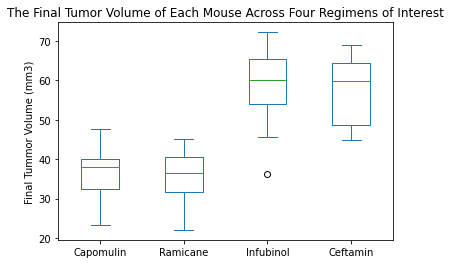

In [157]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = pd.DataFrame({"Capomulin": tumor_vol[0], "Ramicane":tumor_vol[1],
                    "Infubinol":tumor_vol[2], "Ceftamin":tumor_vol[3]})
ax = data[["Capomulin", "Ramicane","Infubinol", "Ceftamin"]].plot(kind='box', 
                                                                  title='The Final Tumor Volume of Each Mouse Across Four Regimens of Interest',
                                                                  ylabel = "Final Tummor Volume (mm3)")

plt.show()



### 5. Line and Scatter Plots

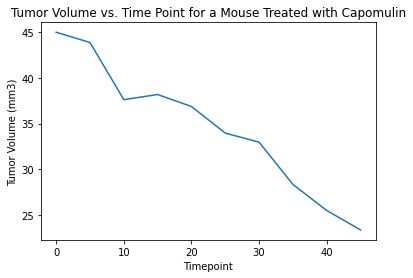

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_mouse_data = final_data.loc[final_data["Mouse ID"] == "s185"]
plt.plot(s185_mouse_data["Timepoint"],s185_mouse_data["Tumor Volume (mm3)"],label = 'Mouse Treatment with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for a Mouse Treated with Capomulin")
plt.show()


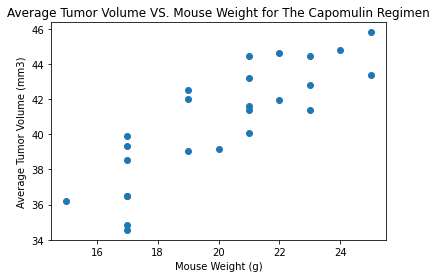

In [153]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data = final_data.loc[final_data["Drug Regimen"] == "Capomulin"]
Capomulin_data

group_ID = Capomulin_data.groupby("Mouse ID")
volume_mean = group_ID["Tumor Volume (mm3)"].mean()
weight = group_ID["Weight (g)"].unique().str.get(0)

plt.scatter(weight,volume_mean)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume VS. Mouse Weight for The Capomulin Regimen")
plt.show()


### 6. Correlation and Regression

The correlation coefficient is 0.84.


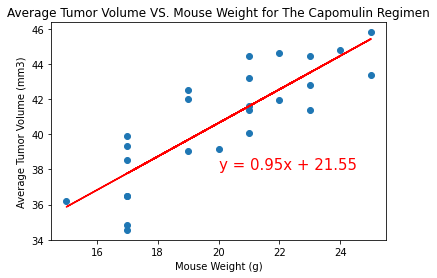

In [152]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor = st.pearsonr(volume_mean,weight)
print(f"The correlation coefficient is {round(cor[0],2)}.")

x_values = weight
y_values = volume_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume VS. Mouse Weight for The Capomulin Regimen")
plt.show()